In [4]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions # decision boundary plot

In [3]:
df = pd.DataFrame()

In [5]:
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]


In [6]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

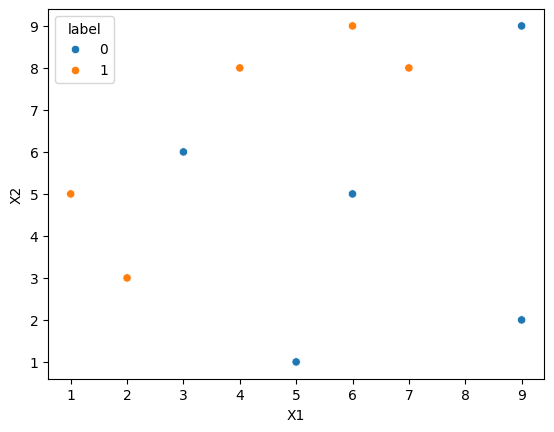

In [7]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

## Assigning every row some weight and each weight should be same

In [8]:
df['weights'] = 1/df.shape[0]

In [9]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


## Building the Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt1 = DecisionTreeClassifier(max_depth=1) #as per decision stumps

In [13]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [14]:
# Step 2 -> Train the 1st Model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

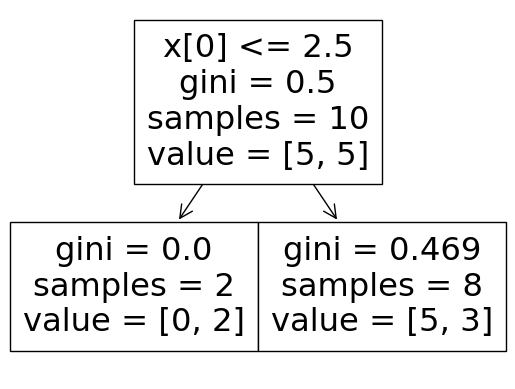

In [16]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

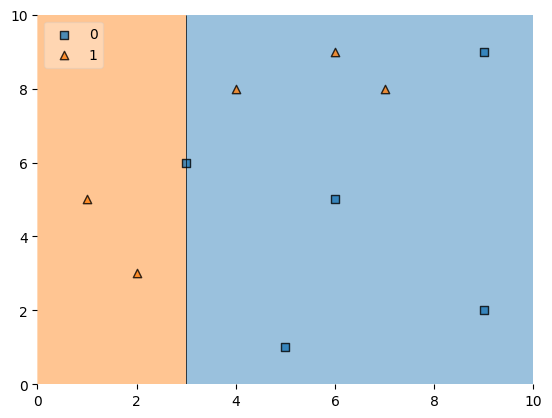

In [17]:
plot_decision_regions(X,y, clf=dt1,legend = 2)

In [18]:
# prediction on the training data
df['y_pred'] = dt1.predict(X)

In [20]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [21]:
# 3 , 5 and 7

def calculate_model_weight(error):

  return 0.5*np.log((1-error)//(error))

In [23]:
# step - 3 calculate the model weight

alpha1 = calculate_model_weight(0.3)
alpha1

0.34657359027997264

In [35]:
# Misclassified weights increased, and correctly classified weights decreased

def update_row_weights(row, alpha=0.346):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)


In [26]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [27]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.070751
1,2,3,1,0.1,1,0.070751
2,3,6,0,0.1,0,0.070751
3,4,8,1,0.1,0,0.141340
4,5,1,0,0.1,0,0.070751
5,6,9,1,0.1,0,0.141340
6,6,5,0,0.1,0,0.070751
7,7,8,1,0.1,0,0.141340
8,9,9,0,0.1,0,0.070751
9,9,2,0,0.1,0,0.070751


In [29]:
df['updated_weights'].sum()

0.9192795257198545

In [30]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [31]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.070751,0.076964
1,2,3,1,0.1,1,0.070751,0.076964
2,3,6,0,0.1,0,0.070751,0.076964
3,4,8,1,0.1,0,0.141340,0.153751
4,5,1,0,0.1,0,0.070751,0.076964
5,6,9,1,0.1,0,0.141340,0.153751
6,6,5,0,0.1,0,0.070751,0.076964
7,7,8,1,0.1,0,0.141340,0.153751
8,9,9,0,0.1,0,0.070751,0.076964
9,9,2,0,0.1,0,0.070751,0.076964


In [36]:
df['normalized_weights'].sum()

1.0

In [37]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])


In [38]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']


In [39]:
df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights', 'cumsum_lower', 'cumsum_upper']]


,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.070751,0.000000,0.076964
1,2,3,1,0.1,1,0.070751,0.076964,0.153928
2,3,6,0,0.1,0,0.070751,0.153928,0.230891
3,4,8,1,0.1,0,0.141340,0.230891,0.384643
4,5,1,0,0.1,0,0.070751,0.384643,0.461606
5,6,9,1,0.1,0,0.141340,0.461606,0.615357
6,6,5,0,0.1,0,0.070751,0.615357,0.692321
7,7,8,1,0.1,0,0.141340,0.692321,0.846072
8,9,9,0,0.1,0,0.070751,0.846072,0.923036
9,9,2,0,0.1,0,0.070751,0.923036,1.000000


In [40]:
def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)

    return indices


In [41]:
index_values = create_new_dataset(df)
index_values


[0, 8, 8, 2, 8, 7, 8, 5, 7, 3]

In [42]:
second_df = df.iloc[index_values,[0,1,2,3]]


In [43]:
second_df


,X1,X2,label,weights
0,1,5,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1


In [44]:
dt2 = DecisionTreeClassifier(max_depth=1)


In [45]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values



In [46]:
dt2.fit(X,y)


DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

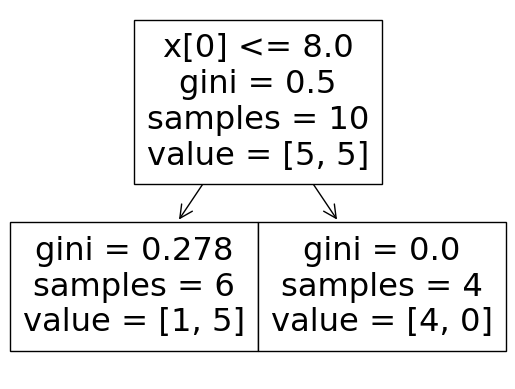

In [47]:
plot_tree(dt2)


<Axes: >

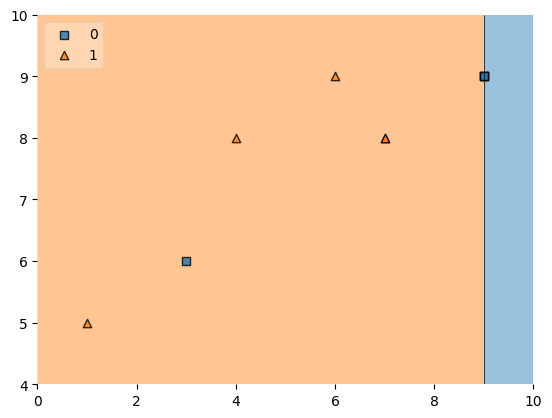

In [48]:
plot_decision_regions(X, y, clf=dt2, legend=2)


In [49]:
second_df['y_pred'] = dt2.predict(X)


In [50]:
second_df


,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,1
8,9,9,0,0.1,0
7,7,8,1,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1


In [51]:
alpha2 = calculate_model_weight(0.1)


In [52]:
alpha2

1.0397207708399179

In [53]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)


In [54]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df


,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
2,3,6,0,0.1,1,0.297427
8,9,9,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622


In [55]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df


,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
8,9,9,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034


In [56]:
second_df['nomalized_weights'].sum()


0.9999999999999999

In [57]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])


In [58]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']


In [59]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.056034,0.000000,0.056034
8,9,9,0,0.1,0,0.056034,0.056034,0.112068
8,9,9,0,0.1,0,0.056034,0.112068,0.168102
2,3,6,0,0.1,1,0.495694,0.168102,0.663796
8,9,9,0,0.1,0,0.056034,0.663796,0.719830
7,7,8,1,0.1,1,0.056034,0.719830,0.775864
8,9,9,0,0.1,0,0.056034,0.775864,0.831898
5,6,9,1,0.1,1,0.056034,0.831898,0.887932
7,7,8,1,0.1,1,0.056034,0.887932,0.943966
3,4,8,1,0.1,1,0.056034,0.943966,1.000000


In [60]:
index_values = create_new_dataset(second_df)


In [61]:
third_df = second_df.iloc[index_values,[0,1,2,3]]


In [62]:
third_df


,X1,X2,label,weights
8,9,9,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1


In [63]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

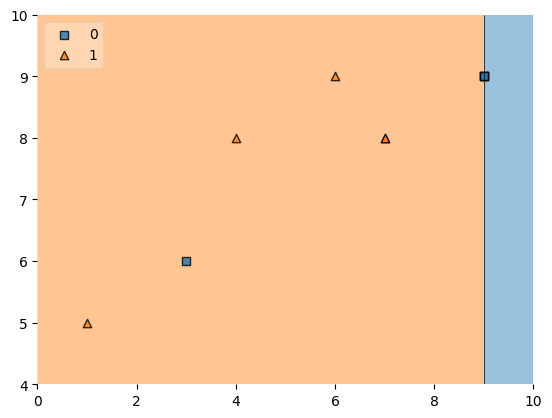

In [64]:
plot_decision_regions(X, y, clf=dt3, legend=2)


In [65]:
third_df['y_pred'] = dt3.predict(X)


In [66]:
third_df


,X1,X2,label,weights,y_pred
8,9,9,0,0.1,1
5,6,9,1,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,1
8,9,9,0,0.1,1
8,9,9,0,0.1,1


In [67]:
alpha3 = calculate_model_weight(0.7)
alpha3


<ipython-input-21-4e8ab05508ce>:5: RuntimeWarning: divide by zero encountered in log
  return 0.5*np.log((1-error)//(error))


-inf

In [68]:
print(alpha1,alpha2,alpha3)


0.34657359027997264 1.0397207708399179 -inf


# Prediction time!

In [69]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)


array([1])

In [70]:
dt2.predict(query)


array([1])

In [71]:
dt3.predict(query)


array([1])

In [72]:
alpha1*1 + alpha2*(1) + alpha3*(1)


-inf

In [73]:
np.sign(1.09)


1.0

In [74]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)



array([0])

In [75]:
dt2.predict(query)


array([0])

In [76]:
dt3.predict(query)


array([0])

In [77]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)


inf

In [78]:
np.sign(-0.25)


-1.0